In [49]:
# 1. Kütüphaneleri ekliyoruz

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [50]:
# 2. Verileri Yüklüyoruz

# 1. Public Spending by Countries 
ireland_spending = pd.read_csv("public_spending_Ireland.csv")
germany_spending = pd.read_csv("public_spending_Germany.csv")
france_spending  = pd.read_csv("public_spending_France.csv")

In [51]:
"burada butun gerekli işlemleri sen yaparsın veri keşfetme aşamalarından bahsediyorum eksik veirler istatistiki veriler vs vs "

'burada butun gerekli işlemleri sen yaparsın veri keşfetme aşamalarından bahsediyorum eksik veirler istatistiki veriler vs vs '

In [52]:
# 2. Public Employment by Countries 
ireland_employment = pd.read_csv("public_employment_Ireland.csv")
germany_employment = pd.read_csv("public_employment_Germany.csv")
france_employment  = pd.read_csv("public_employment_France.csv")

------------------------

------------------------

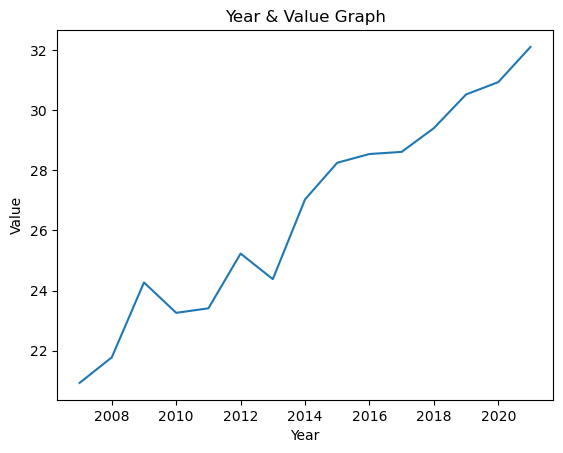

In [53]:
# Verileri görselleştirelim 
# Ben burada almanya için yapiyorum sende digerleri için yap. Burada veriyi keşfediyoruzş.

# Spending burada grafigin yıllara göre sürekli arttıgndan bahset. Artan sey public service için gereken para
plt.plot(germany_spending['Year'], germany_spending['Value'])
plt.xlabel('Year')  # x ekseni etiketi
plt.ylabel('Value') # y ekseni etiketi
plt.title('Year & Value Graph')  # Grafiğin başlığı
plt.show()

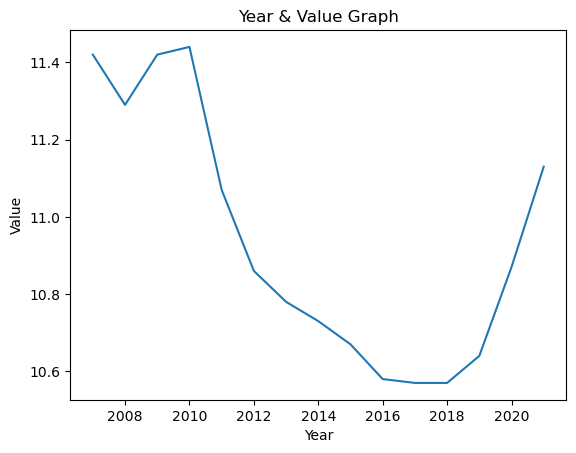

In [54]:
# Employment Grafik 
# burada da yıllara göre calısan public service de calısan kişinin sayısını yorumlat artıyorsa artıyor azaliyorsa azaliyor diyeceksin 

plt.plot(germany_employment['Year'], germany_employment['Value'])
plt.xlabel('Year')  # x ekseni etiketi
plt.ylabel('Value') # y ekseni etiketi
plt.title('Year & Value Graph')  # Grafiğin başlığı
plt.show()

----------------

----------------------


In [55]:
# Zaman Serisi Analizi Yapiyorum almanya için

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot


In [56]:
# germany spending
data = germany_spending
data.set_index('Year', inplace=True)


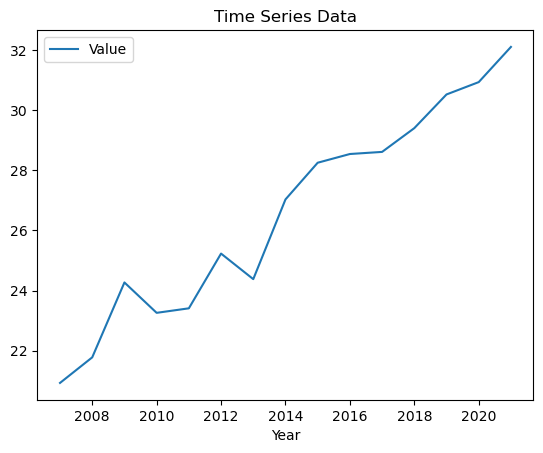

In [57]:
# Görselleştirme
data.plot()
plt.title('Time Series Data')
plt.show()

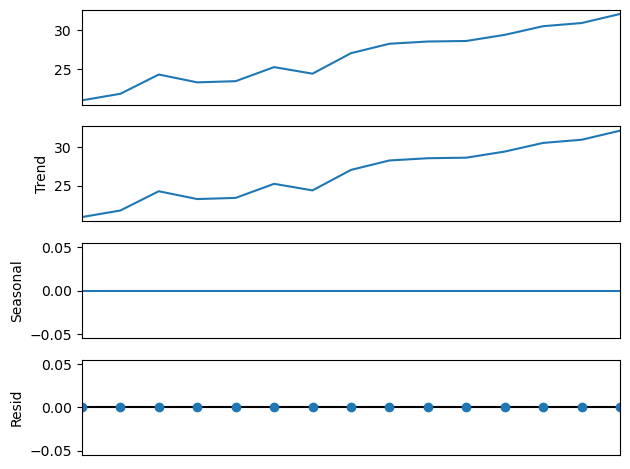

In [58]:
# DataFrame'den 'Country' ve 'Indicator' sütunlarını çıkarma
data_numeric = data.drop(['Country', 'Indicator'], axis=1)
data_numeric.index = pd.to_datetime(data_numeric.index)

# Zaman serisi dekompozisyonunu uygulama
# Burada 'period' argümanı olarak 1 kullanıyoruz, çünkü veri yıllıktır
decomposition = sm.tsa.seasonal_decompose(data_numeric, model='additive', period=1)
decomposition.plot()
plt.show()

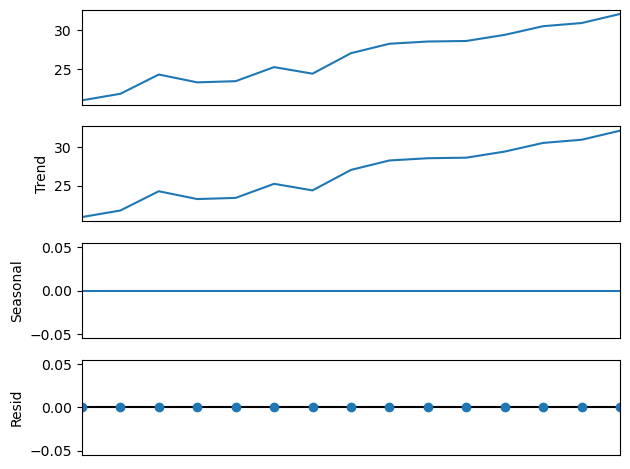

In [59]:
# Yıl sütununu pandas'ın Datetime formatına dönüştürme
data_numeric.index = pd.to_datetime(data_numeric.index)

# Zaman serisi dekompozisyonunu uygulama
# Burada 'period' argümanı olarak 1 kullanıyoruz, çünkü veri yıllıktır
decomposition = sm.tsa.seasonal_decompose(data_numeric, model='additive', period=1)
decomposition.plot()
plt.show()

In [66]:
from statsmodels.tsa.arima.model import ARIMA

# Veri setini ve model parametrelerini hazırlama
# data burada sayısal ve zaman serisi formatında olmalı
p = 1  # Lag order
d = 1  # Difference order
q = 1  # Error order

# Yeni ARIMA modelini uygulama
model = ARIMA(data_numeric, order=(p, d, q))
model_fit = model.fit()

# Model özeti
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -21.934
Date:                Thu, 04 Jan 2024   AIC                             49.868
Time:                        20:18:01   BIC                             51.785
Sample:                             0   HQIC                            49.691
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.183      5.455      0.000       0.641       1.359
ma.L1         -0.9951     17.604     -0.057      0.955     -35.499      33.509
sigma2         1.1693     20.332      0.058      0.9

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [77]:
# Gelecek 5 yıl için tahmin yapma
forecast_steps = 5
forecast_values = model_fit.get_forecast(steps=forecast_steps).predicted_mean

# Tahmin edilen değerleri yazdırma
for i, value in enumerate(forecast_values, 1):
    print(f"Predict Next 202{i} : {value:.2f}")

Predict Next 2021 : 32.79
Predict Next 2022 : 33.49
Predict Next 2023 : 34.18
Predict Next 2024 : 34.87
Predict Next 2025 : 35.57


C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
